In [74]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)
(256, 256)


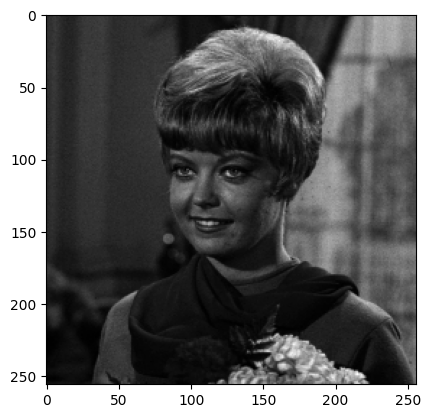

In [75]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/girl.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

In [76]:
outImg = np.zeros(gImg.shape, dtype='uint8')

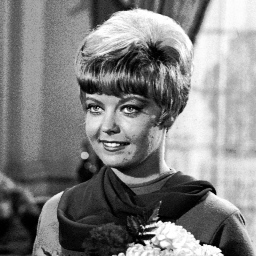

In [77]:
outImg = cv2.equalizeHist(gImg)
cv2_imshow(outImg)

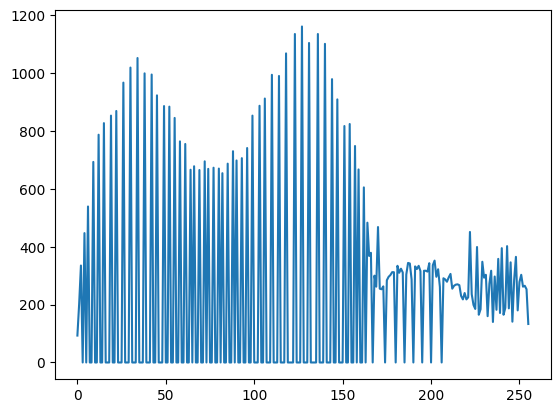

In [78]:
hist = cv2.calcHist([outImg], [0], None, [256], [0, 256])
plt.plot(hist)

In [79]:
myHist = np.zeros((256,1), dtype=np.int32)

히스토그램 만들기

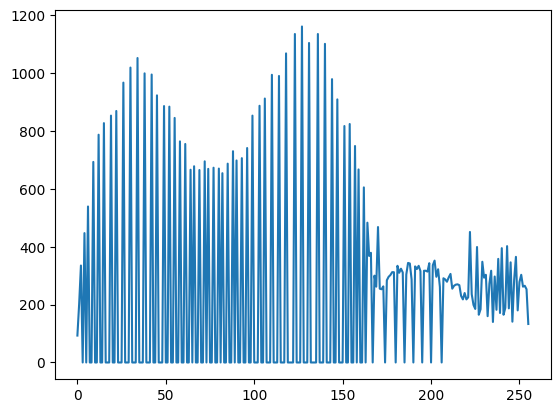

In [80]:
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    myHist[outImg[h,w]] += 1

plt.plot(myHist)

In [81]:
cumulHist = np.zeros((256,1), dtype=np.int32)

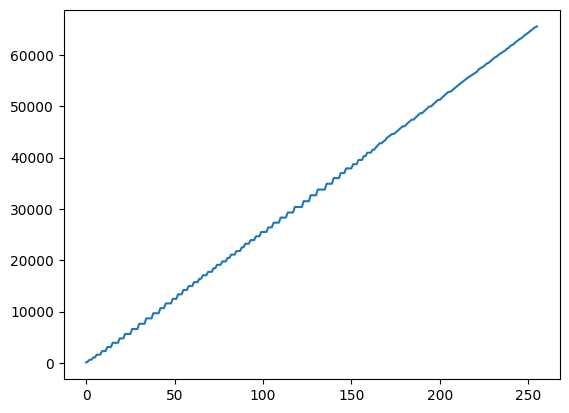

In [82]:
cumulHist[0] = myHist[0]
for i in range(1,256):
  cumulHist[i] = cumulHist[i-1] + myHist[i]

plt.plot(cumulHist)

히스토그램 평활화

In [83]:
equalHist = np.zeros((256,1), dtype=np.int32)

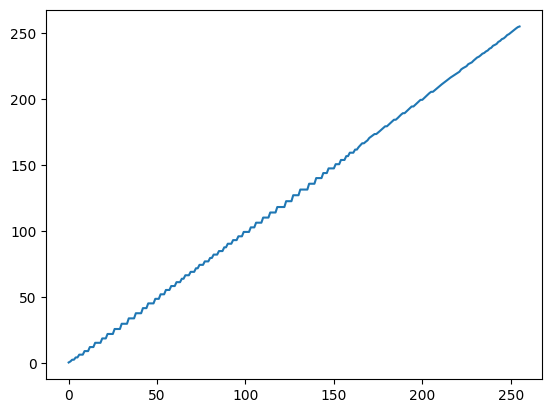

In [84]:
numOfPixel = gImg.shape[0] * gImg.shape[1]
equalHist = cumulHist / numOfPixel
equalHist = equalHist * 255

plt.plot(equalHist)

/tmp/ipython-input-162542930.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outImg[h,w] = equalHist[gImg[h,w]]


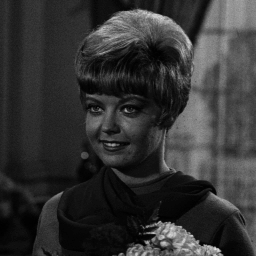

In [85]:
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    outImg[h,w] = equalHist[gImg[h,w]]

cv2_imshow(outImg)